<a id='1.1'></a>
## 2.1. Loading the python packages

In [2]:
# Load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import read_csv, set_option
from pandas.plotting import scatter_matrix
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import pandas_datareader as dr
import pickle

# Import Model Packages 
from sklearn.cluster import KMeans, AgglomerativeClustering, AffinityPropagation, DBSCAN
from scipy.cluster.hierarchy import fcluster
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet
from scipy.spatial.distance import pdist
from sklearn.metrics import adjusted_mutual_info_score
from sklearn import cluster, covariance, manifold
from statsmodels.tsa.stattools import coint

# Other Helper Packages and functions
import matplotlib.ticker as ticker
from itertools import cycle

import yahoo_fin.stock_info as si
import yfinance as yf

from datetime import datetime
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline
%load_ext autotime

time: 0 ns (started: 2022-10-16 14:24:00 +08:00)


<a id='1.2'></a>
## 2.2. Loading the Data

In [6]:
# The dataset was obtained from Kaggle and imported
dataset = pickle.load(open('./data/01_pricedate_2015_2019.pkl', 'rb'))
company_info = pd.read_csv('./data/ratios.csv')

time: 16 ms (started: 2022-10-16 14:24:42 +08:00)


In [47]:
# Shape of dataset
dataset.shape

(1256, 487)

time: 0 ns (started: 2022-10-16 13:39:38 +08:00)


In [48]:
# peek at data
set_option('display.width', 100)
dataset.head(5)

Symbol,A,AAL,AAP,AAPL,ABBV,ABC,ABMD,ABT,ACN,ADBE,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-05,37.420,51.051,151.337,24.120,46.711,79.662,37.07,39.125,76.427,71.98,...,127.431,29.178,64.219,49.260,32.530,44.445,107.126,76.34,24.042,41.036
2015-01-06,36.837,50.256,151.230,24.122,46.480,80.097,36.13,38.681,75.875,70.53,...,124.712,29.334,63.878,48.649,32.339,43.900,106.218,75.79,23.124,40.636
2015-01-07,37.326,50.227,154.480,24.461,48.358,81.696,37.28,38.994,77.468,71.11,...,128.375,29.587,64.525,49.909,32.594,45.354,108.859,77.72,23.345,41.474
2015-01-08,38.445,50.843,155.834,25.400,48.864,81.882,38.96,39.796,78.649,72.92,...,129.919,29.930,65.599,51.142,32.840,46.144,110.015,79.38,23.671,42.113
2015-01-09,38.163,49.289,155.041,25.428,47.527,82.602,38.41,39.378,78.562,71.84,...,131.543,29.562,65.507,50.397,32.220,46.063,108.428,80.54,23.009,42.180


time: 16 ms (started: 2022-10-16 13:39:39 +08:00)


In [49]:
# describe data
set_option('precision', 3)
dataset.describe()

Symbol,A,AAL,AAP,AAPL,ABBV,ABC,ABMD,ABT,ACN,ADBE,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
count,1256.000,1256.000,1256.000,1256.000,1256.000,1256.000,1256.000,1256.000,1256.000,1256.000,...,1256.000,1256.000,1256.000,1256.000,1256.000,1256.000,1256.000,1256.000,1256.000,1256.000
mean,55.006,39.638,143.622,36.906,59.805,82.091,182.990,52.047,127.330,167.241,...,111.760,40.805,62.954,53.025,54.490,70.015,109.944,122.043,36.427,68.409
std,14.512,7.182,23.422,11.335,14.624,8.115,107.157,15.550,33.608,79.427,...,30.902,9.438,3.668,7.393,16.691,18.610,11.452,53.268,9.894,25.690
min,31.622,24.281,77.127,21.099,36.022,62.801,36.130,32.535,73.530,69.990,...,46.518,26.588,50.110,33.568,27.965,42.096,84.815,46.930,17.704,37.846
25%,39.922,33.877,136.224,26.777,47.497,76.607,97.265,39.348,100.986,93.993,...,89.535,34.143,60.485,49.051,38.141,55.215,103.562,80.683,25.753,46.105
50%,57.711,39.597,149.835,36.048,56.181,81.444,142.980,45.068,117.823,143.605,...,111.691,39.919,63.094,54.760,51.807,68.095,109.340,105.910,38.932,60.530
75%,66.881,45.370,158.723,45.070,73.447,85.989,265.538,64.727,152.798,249.120,...,131.382,45.372,65.577,58.498,71.192,82.795,116.975,163.580,45.054,86.562
max,84.129,56.989,194.023,72.026,99.695,102.871,449.750,85.388,205.783,331.200,...,190.356,62.595,71.204,66.581,82.366,114.009,144.435,258.280,53.566,131.554


time: 453 ms (started: 2022-10-16 13:39:40 +08:00)


In [7]:
company_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Symbol    505 non-null    object 
 1   Name      505 non-null    object 
 2   Sector    505 non-null    object 
 3   Price     505 non-null    float64
 4   PE        503 non-null    float64
 5   DivdYld   505 non-null    float64
 6   EPS       505 non-null    float64
 7   52WLow    505 non-null    float64
 8   52WkHigh  505 non-null    float64
 9   MktCap    505 non-null    float64
 10  EBITDA    505 non-null    float64
 11  PS        505 non-null    float64
 12  PB        497 non-null    float64
dtypes: float64(10), object(3)
memory usage: 51.4+ KB
time: 0 ns (started: 2022-10-16 14:24:49 +08:00)


In [15]:
# Since we only have a few null values, we can drop
company_info = company_info.dropna()

time: 0 ns (started: 2022-10-16 14:27:16 +08:00)


## Define functions

In [16]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

time: 0 ns (started: 2022-10-16 14:27:43 +08:00)


In [36]:
# function to create labeled barplots

def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )
    plt.xticks(rotation=70)

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

time: 0 ns (started: 2022-10-16 14:32:17 +08:00)


In [37]:
# selecting numerical columns
num_cols = company_info.select_dtypes(include=np.number).columns.tolist()

time: 0 ns (started: 2022-10-16 14:32:17 +08:00)


### Plot some variables to see the distribution

In [38]:
istogram_boxplot(company_info, num_cols[0], bins=50, kde=True, figsize=(10, 5))

NameError: name 'istogram_boxplot' is not defined

time: 16 ms (started: 2022-10-16 14:32:18 +08:00)


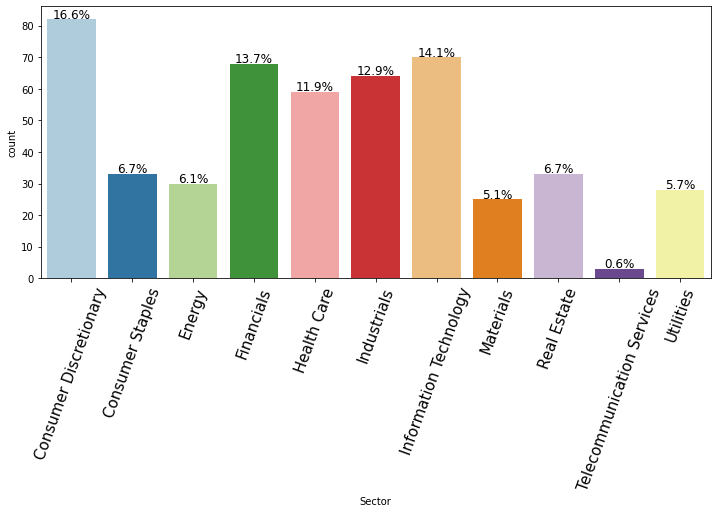

time: 140 ms (started: 2022-10-16 14:32:18 +08:00)


In [39]:
labeled_barplot(company_info, "Sector", perc=True)

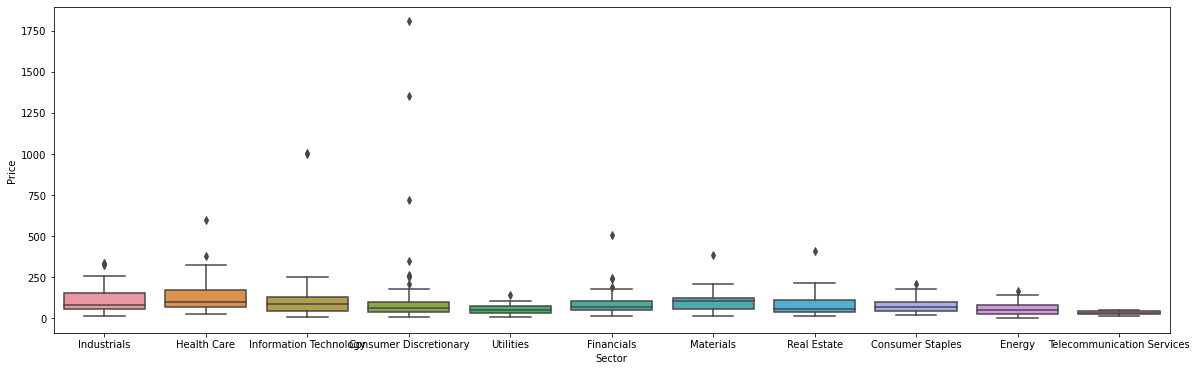

time: 187 ms (started: 2022-10-16 14:32:57 +08:00)


In [42]:
# Bivariate analysis
# Stock Price_Change Vs. GICS_Sector

plt.figure(figsize=(20,6))
sns.boxplot(data = company_info, y = "Price", x = "Sector");